<a href="https://colab.research.google.com/github/akhils-codes1/random_vs_des/blob/main/rechecked_random_desr2_10000_dscapproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.7 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *
import timm

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
!ls /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach

png.zip  rechecked_random_desr2_10000_dscapproach.ipynb  test_png.zip


In [5]:
%cd /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach

/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach


In [6]:
!ls

png.zip  rechecked_random_desr2_10000_dscapproach.ipynb  test_png.zip


In [7]:
!unzip '/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png.zip' -d '/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/1_1.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_3.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/1_11.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/1_14.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_23.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_26.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/1_25.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/1_31.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_32.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/

In [8]:
path = Path('/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png')

In [9]:
files = get_image_files(path)
files[0]

Path('/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_1.png')

In [10]:
len(files)

10000

In [11]:
pat = r'^(.*)_\d+.png'

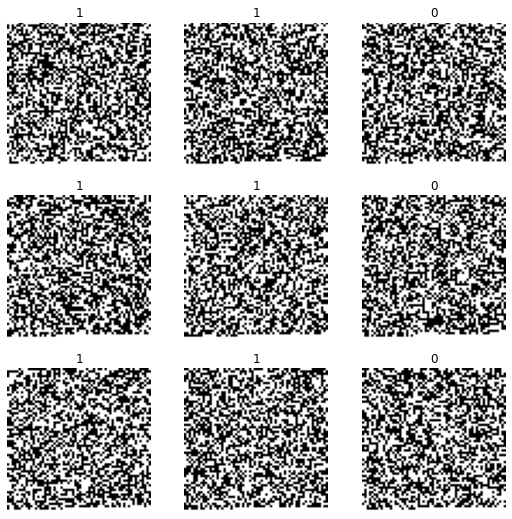

In [13]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(62))
dls1.show_batch()

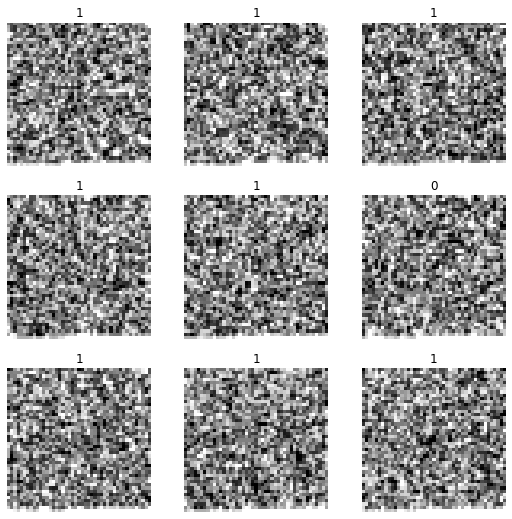

In [20]:
dls3 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls3.show_batch()

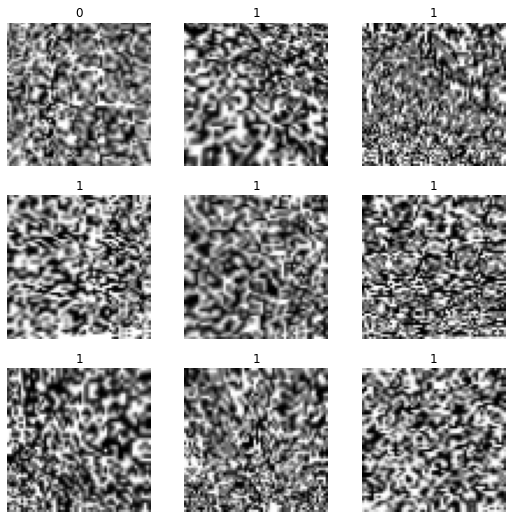

In [14]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(62, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

In [15]:
def runit(dls,architecture,epochs):
  learn = vision_learner(dls, architecture , metrics=accuracy)
  x = learn.lr_find(suggest_funcs=(slide, valley))
  lr = (x[0]+x[1])/2.0
  learn.fine_tune(epochs,lr)
  learn.show_results()
  return learn

#Densenet121

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


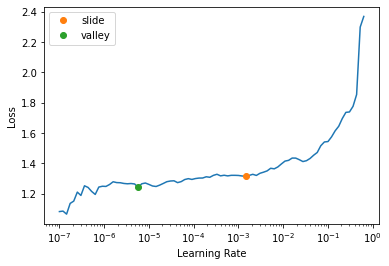

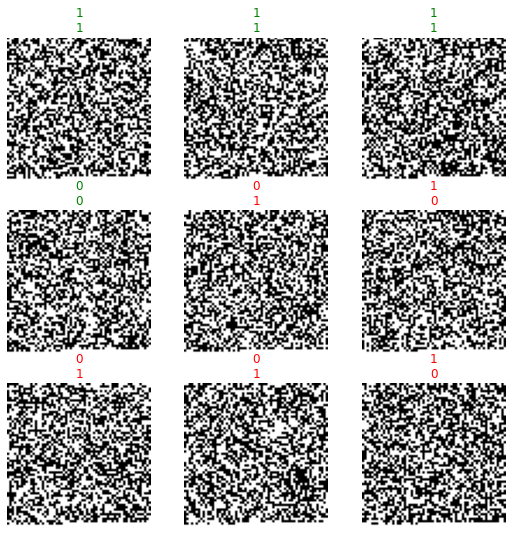

In [16]:
densenet1 = runit(dls1, 'densenet121', 10)

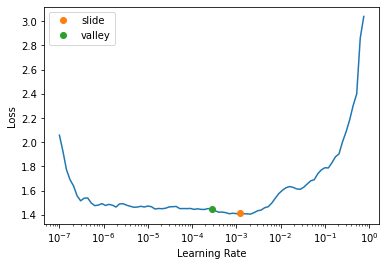

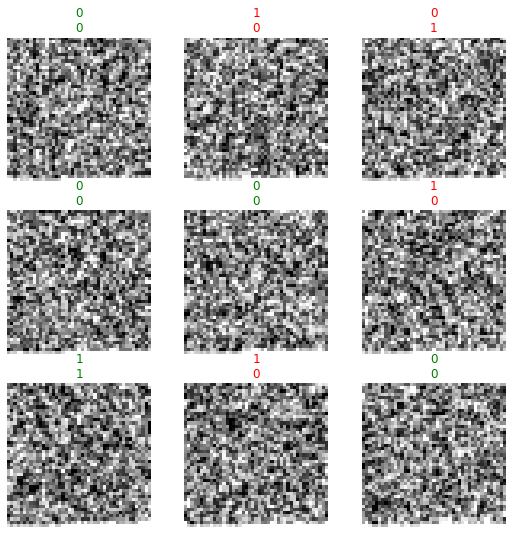

In [21]:
densenet3 = runit(dls3, 'densenet264',20)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth" to /root/.cache/torch/hub/checkpoints/convnext_nano_d1h-7eb4bdea.pth


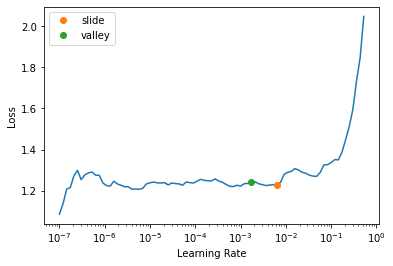

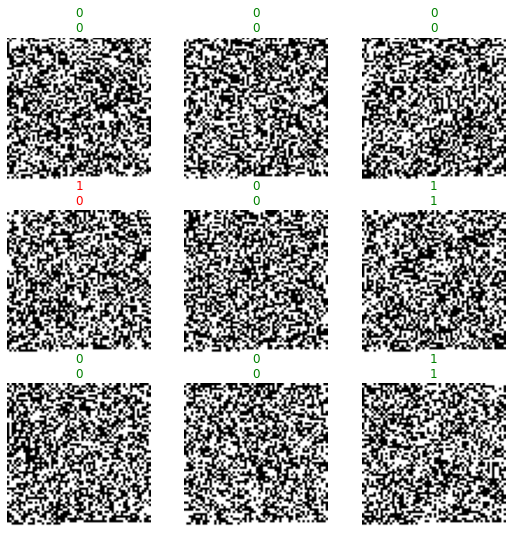

In [22]:
convnext1 = runit(dls1,'convnext_nano',10)

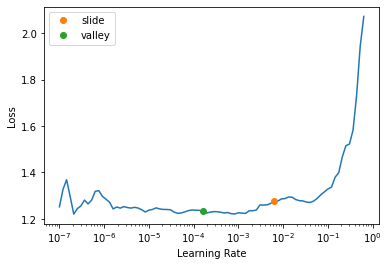

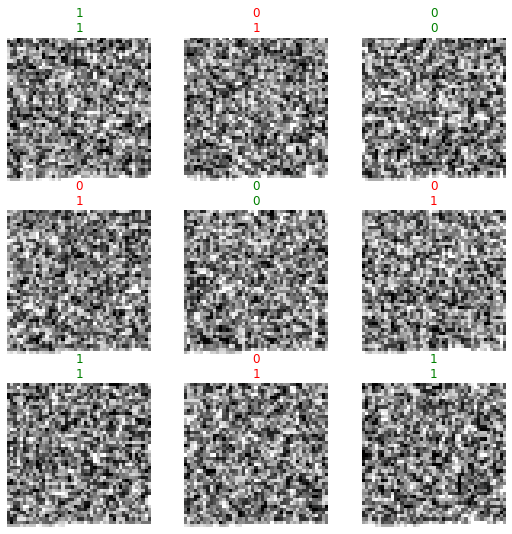

In [23]:
convnext3 = runit(dls3,'convnext_nano',10)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_large_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_large_1k_224_ema.pth


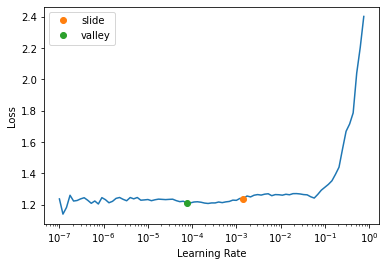

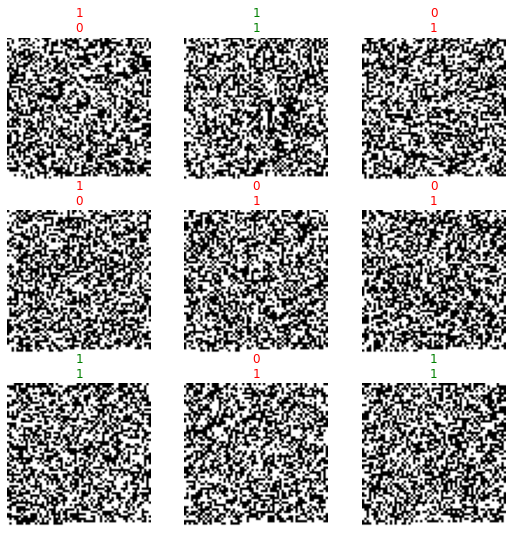

In [24]:
convnext11 = runit(dls1,'convnext_large',10)

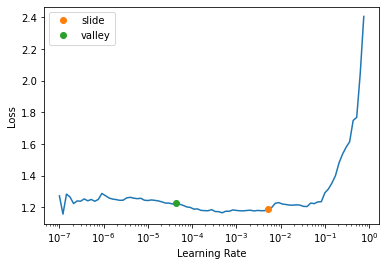

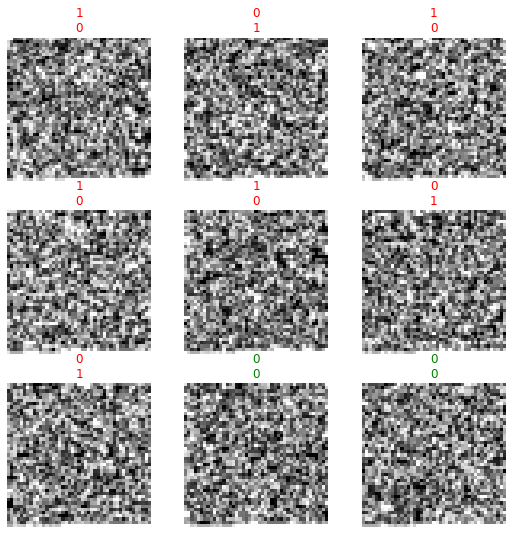

In [25]:
convnext31 = runit(dls3,'convnext_large',10)

In [18]:
timm.list_models("dense*")

['densenet121',
 'densenet121d',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264',
 'densenet264d_iabn',
 'densenetblur121d']

In [ ]:
import os
l = os.listdir('/content/')
for i in l:
  if i[-4:]=='.png':
    print(i, res_2_dense.predict('/content/'+i))

1_471.png ('1', TensorBase(1), TensorBase([1.0466e-14, 1.0000e+00]))


0_470.png ('1', TensorBase(1), TensorBase([1.3956e-13, 1.0000e+00]))


0_350.png ('1', TensorBase(1), TensorBase([9.1540e-14, 1.0000e+00]))


0_487.png ('1', TensorBase(1), TensorBase([3.0553e-14, 1.0000e+00]))


1_380.png ('1', TensorBase(1), TensorBase([6.5113e-17, 1.0000e+00]))


0_372.png ('1', TensorBase(1), TensorBase([2.1587e-15, 1.0000e+00]))


1_425.png ('1', TensorBase(1), TensorBase([4.3632e-08, 1.0000e+00]))


0_440.png ('1', TensorBase(1), TensorBase([1.9924e-14, 1.0000e+00]))


0_390.png ('1', TensorBase(1), TensorBase([2.9218e-09, 1.0000e+00]))


1_476.png ('1', TensorBase(1), TensorBase([8.5451e-13, 1.0000e+00]))


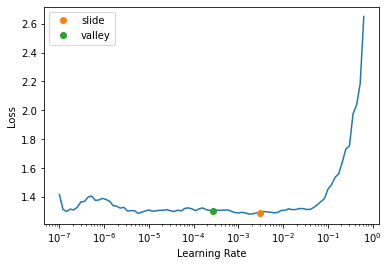

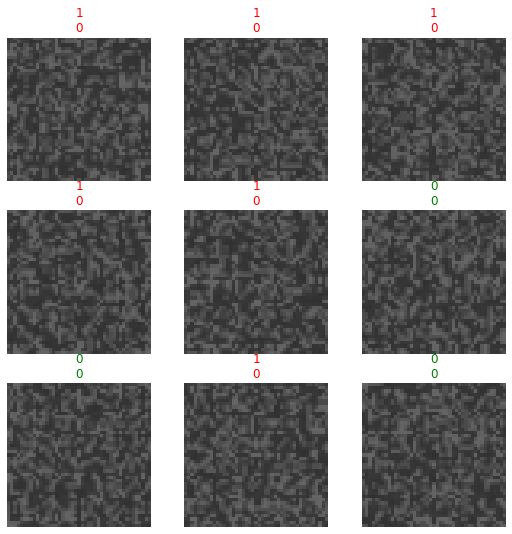

In [ ]:
res_dense = runit(dls2, 'densenet121' , 10)

#DarkNet

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/darknet53_256_c2ns-3aeff817.pth" to /root/.cache/torch/hub/checkpoints/darknet53_256_c2ns-3aeff817.pth


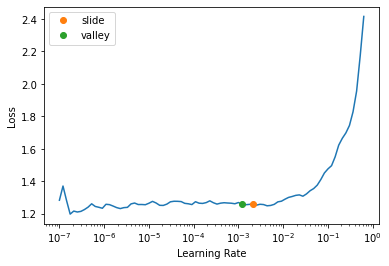

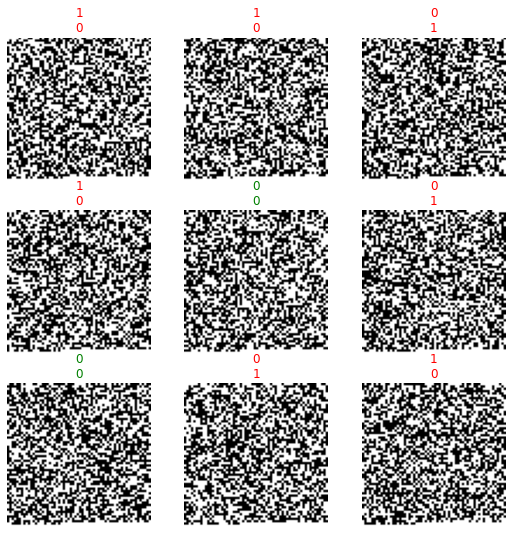

In [26]:
darknet_1 = runit(dls1, 'darknet53',10)

In [ ]:
import os
l = os.listdir('/content/')
for i in l:
  if i[-4:]=='.png':
    print(i, darknet_1.predict('/content/'+i))

1_471.png ('1', TensorBase(1), TensorBase([0.0419, 0.9581]))


0_470.png ('1', TensorBase(1), TensorBase([0.0051, 0.9949]))


0_350.png ('0', TensorBase(0), TensorBase([0.9711, 0.0289]))


0_487.png ('0', TensorBase(0), TensorBase([0.8905, 0.1095]))


1_380.png ('1', TensorBase(1), TensorBase([5.0865e-05, 9.9995e-01]))


0_372.png ('1', TensorBase(1), TensorBase([2.9945e-04, 9.9970e-01]))


1_425.png ('1', TensorBase(1), TensorBase([0.0021, 0.9979]))


0_440.png ('1', TensorBase(1), TensorBase([5.0233e-04, 9.9950e-01]))


0_390.png ('0', TensorBase(0), TensorBase([0.7640, 0.2360]))


1_476.png ('1', TensorBase(1), TensorBase([1.7572e-06, 1.0000e+00]))


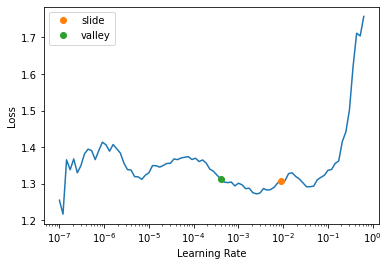

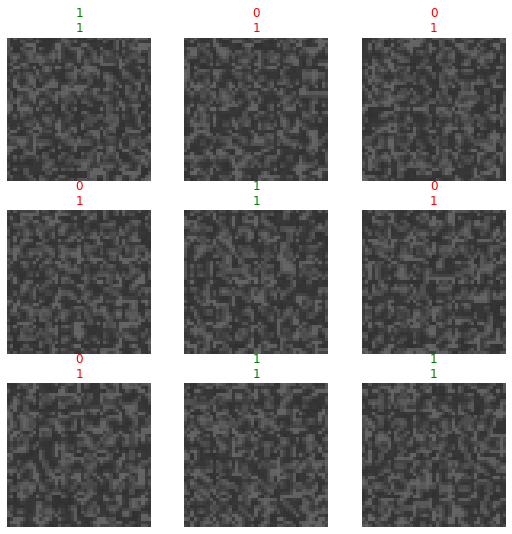

In [ ]:
darknet_2 = runit(dls2, 'darknet53',5)

#ConvNext

In [ ]:
# convnext_1 = runit(dls1, 'convnext_nano',5)

In [ ]:
# convnext_2 = runit(dls2, 'convnext_nano',5)

#pnasnet5large

In [ ]:
pnasnet1 = runit(dls1, 'pnasnet5large',5)

In [ ]:
# pnasnet2 = runit(dls2, 'pnasnet5large',5)

#ResNext101_64x4d

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/resnext101_64x4d_c-0d0e0cc0.pth" to /root/.cache/torch/hub/checkpoints/resnext101_64x4d_c-0d0e0cc0.pth


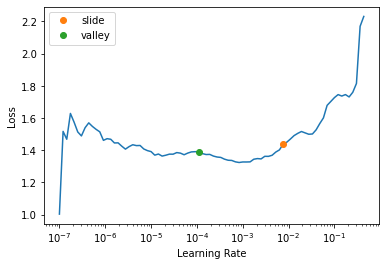

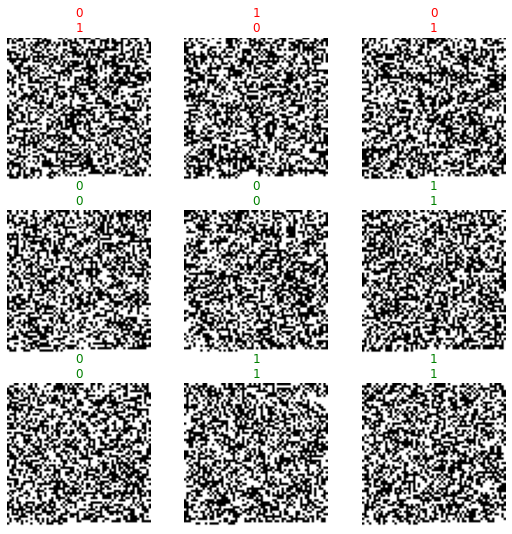

In [27]:
resnext1 = runit(dls1, 'resnext101_64x4d',5)

In [ ]:
# resnext2 = runit(dls2, 'resnext101_64x4d',5)

In [ ]:
timm.list_models("*net*")

#ResNet152

In [29]:
resnet1 = runit(dls1, 'resnet152',5)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


OutOfMemoryError: ignored

In [ ]:
# resnet2 = runit(dls2, 'resnet152',5)